In [1]:
# current date, for retrieving data from proper location.
year = "2024"
month = "April"
day = "16"

## Imports and initialization

In [2]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.Constants as cs
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [4]:
def double_gaussian(x, a1, b1, c1, a2, b2, c2):
    return a1 * np.exp(-(x - b1)**2 / (2 * c1**2)) + a2 * np.exp(-(x - b2)**2 / (2 * c2**2))


# Today's Work

### File 11 (3DGSBC_Top_Sideband_Spectroscopy_1x2):  

Number of Pictures: 2000; Picture Dimensions: 5 x 24
Variations: 20;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 11:32:59: on (Y-M-D) 2024-4-18, And ended at 11:40:38: on 2024-4-18
Experiment Notes:  



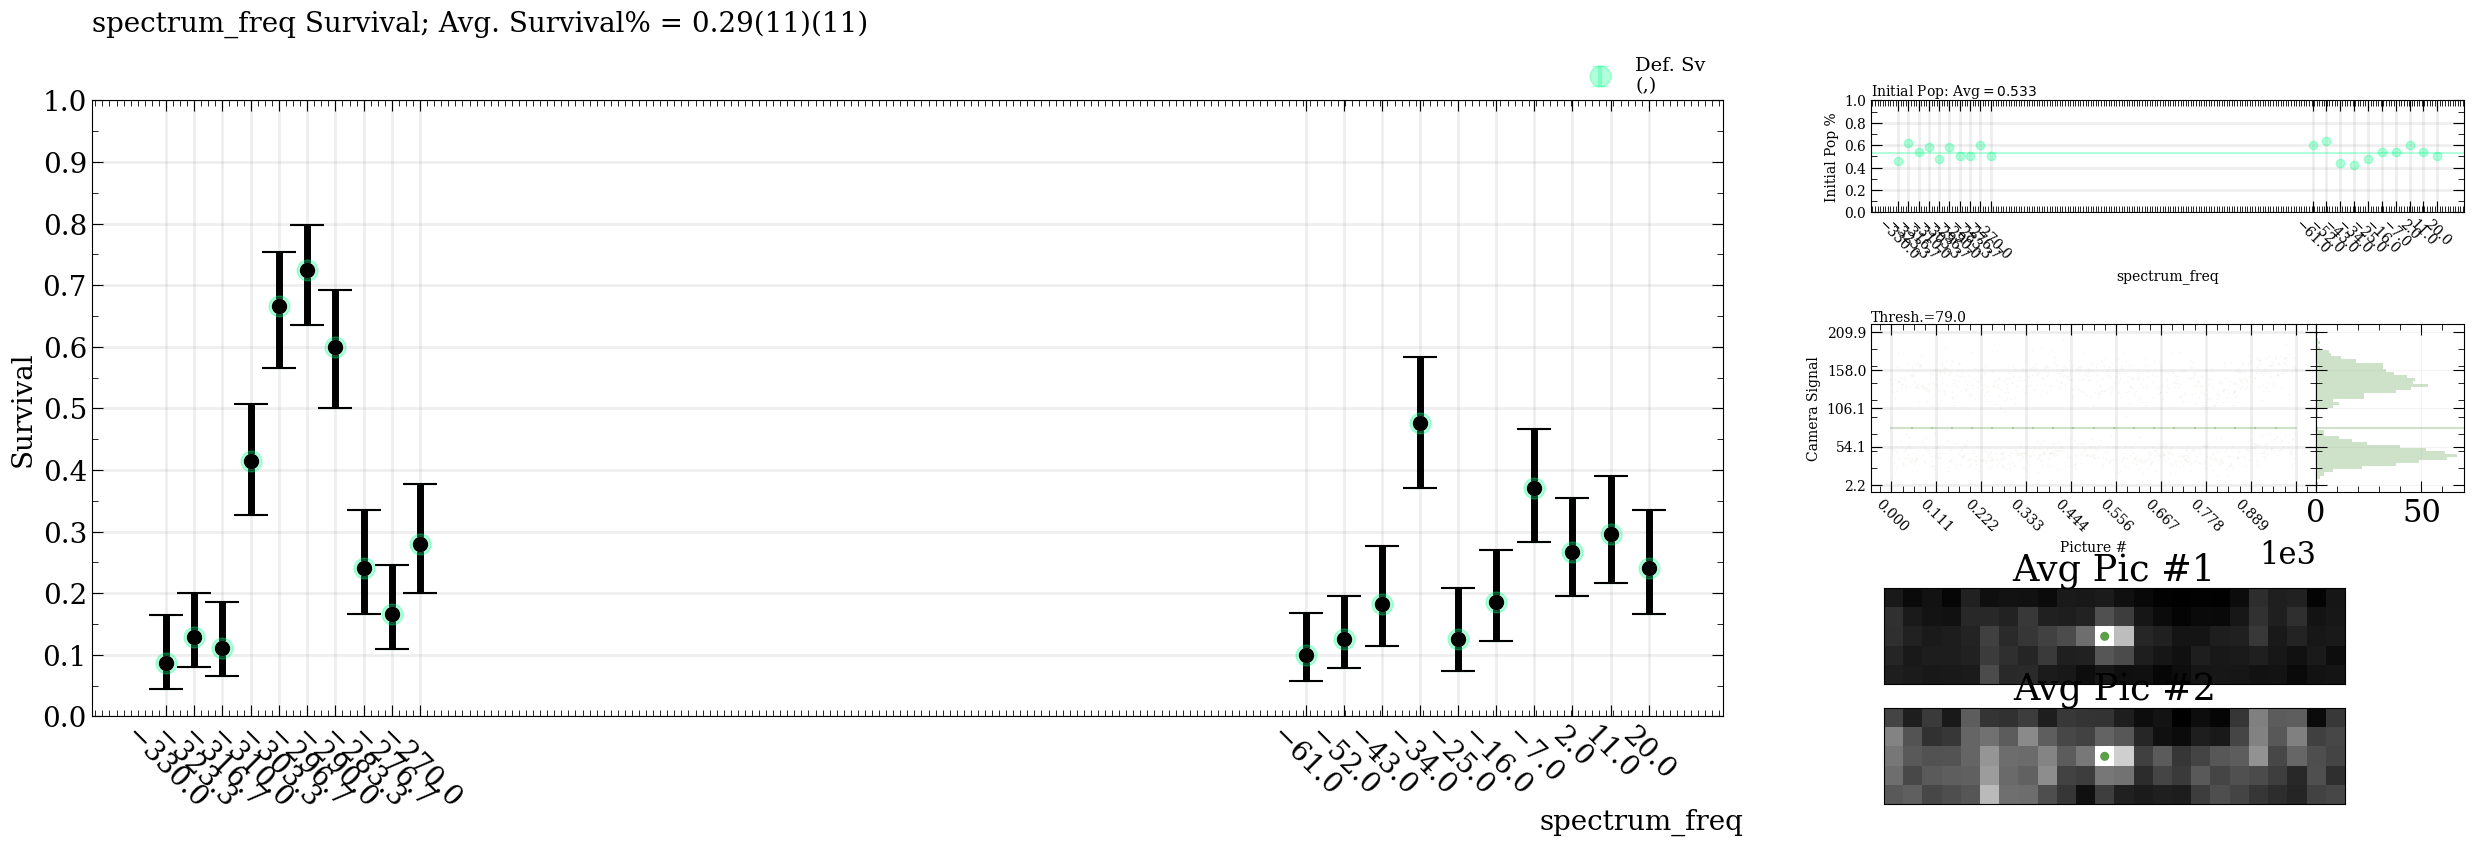

In [35]:
atomlocs = [2,11,0,1,1]
reloadMyModules(18,'April')
mp.Survival(11, atomlocs);

### File 14 (7x1_trap_frequency_measurements):  

Number of Pictures: 750; Picture Dimensions: 5 x 24
Variations: 15;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 11:55:47: on (Y-M-D) 2024-4-18, And ended at 11:59:7: on 2024-4-18
Experiment Notes:  



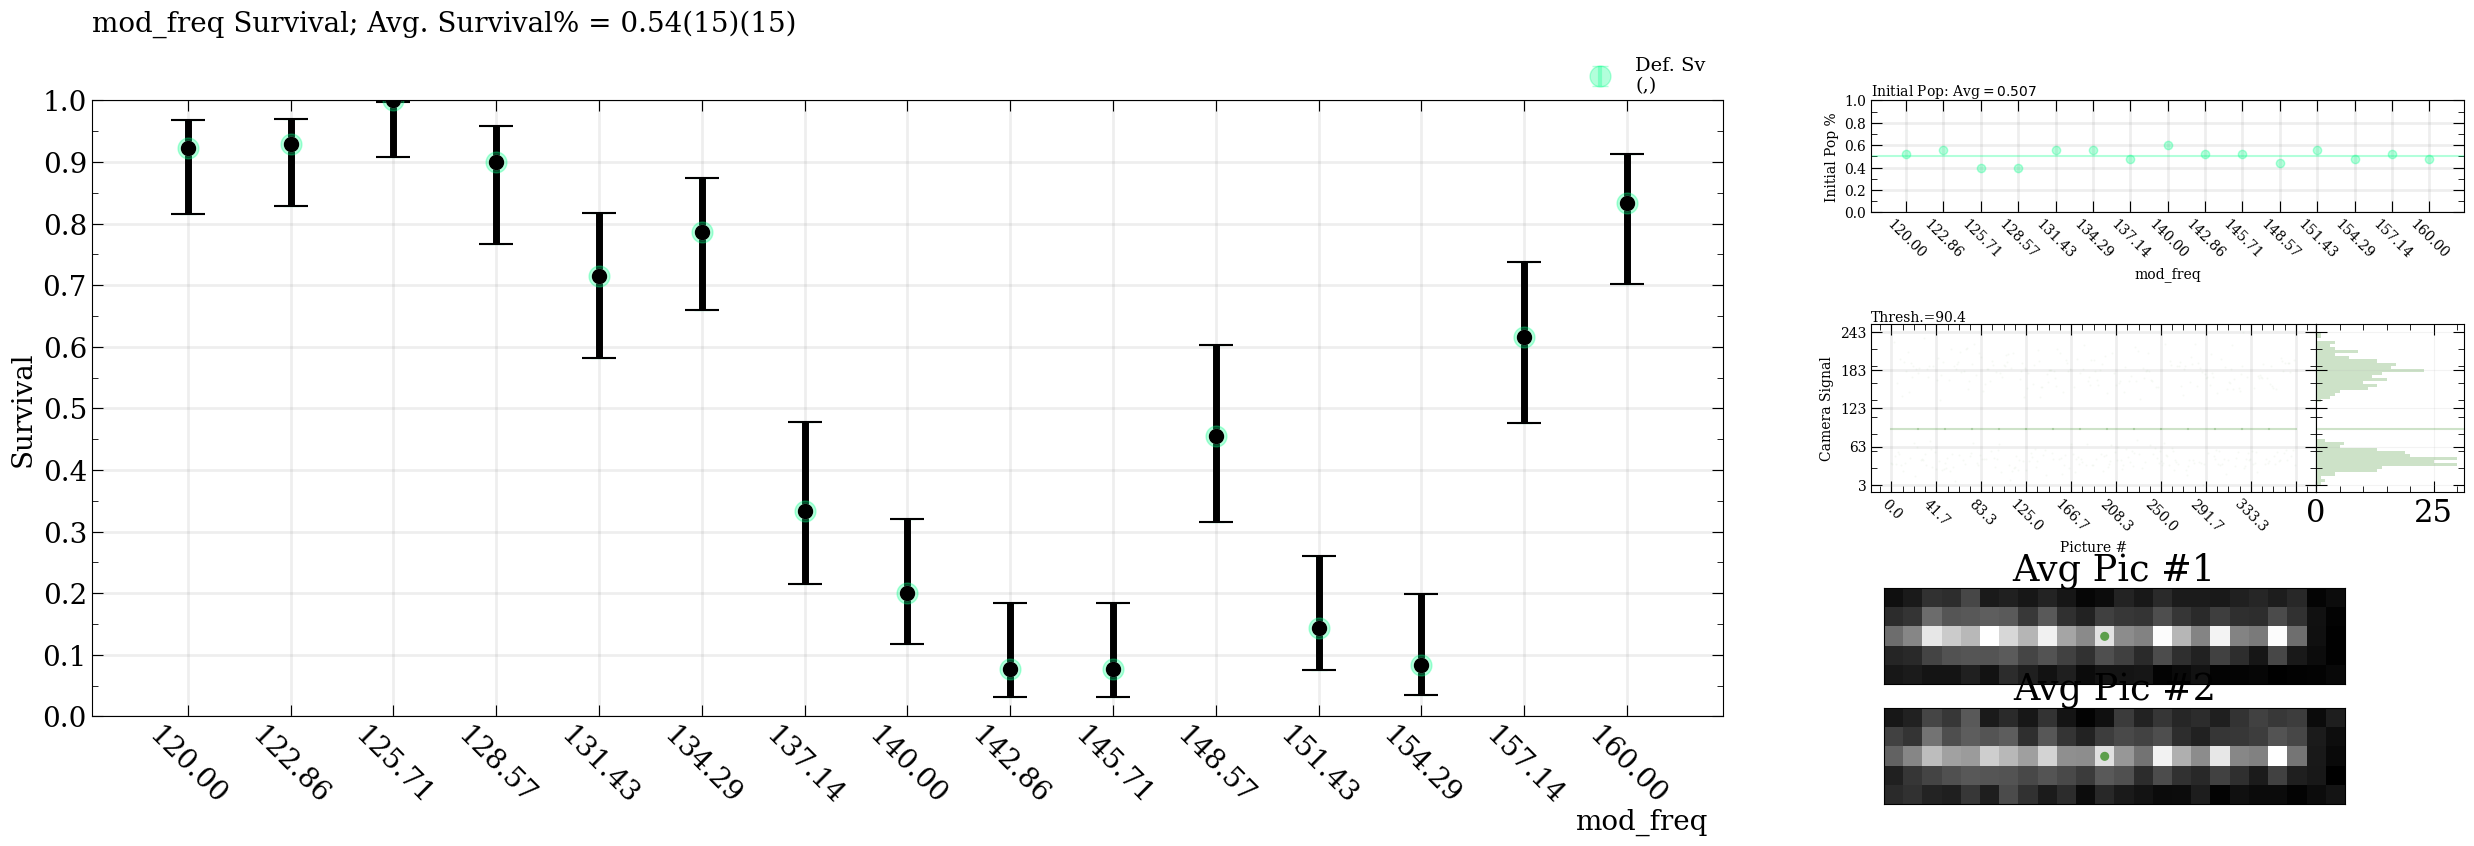

In [39]:
atomlocs = [2,11,0,1,1]
reloadMyModules(18,'April')
mp.Survival(14, atomlocs);

### File 15 (7x1_trap_frequency_measurements):  

Number of Pictures: 750; Picture Dimensions: 5 x 24
Variations: 15;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 12:39:29: on (Y-M-D) 2024-4-18, And ended at 12:42:44: on 2024-4-18
Experiment Notes:  



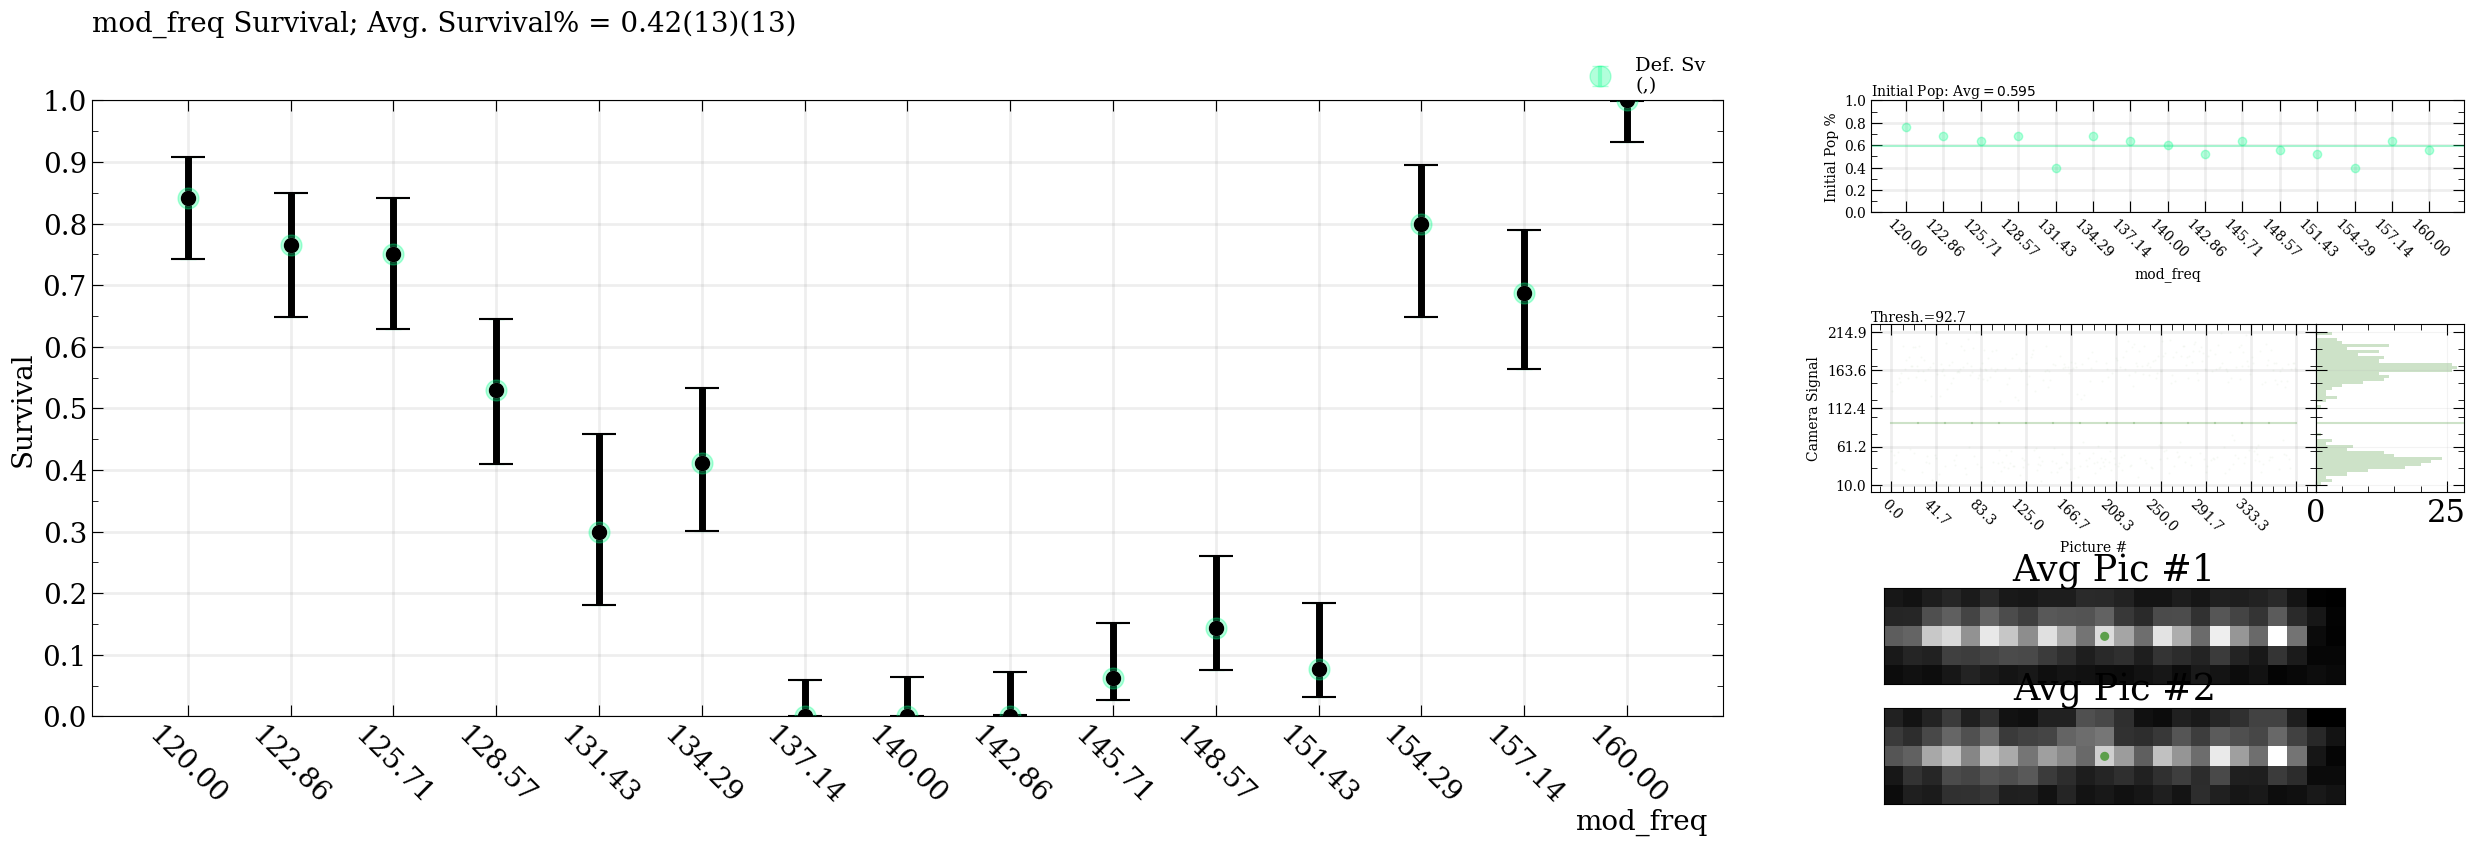

In [40]:
atomlocs = [2,11,0,1,1]
reloadMyModules(18,'April')
mp.Survival(15, atomlocs);

### File 16 (7x1_trap_frequency_measurements):  

Number of Pictures: 750; Picture Dimensions: 5 x 24
Variations: 15;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 12:50:46: on (Y-M-D) 2024-4-18, And ended at 12:54:3: on 2024-4-18
Experiment Notes:  



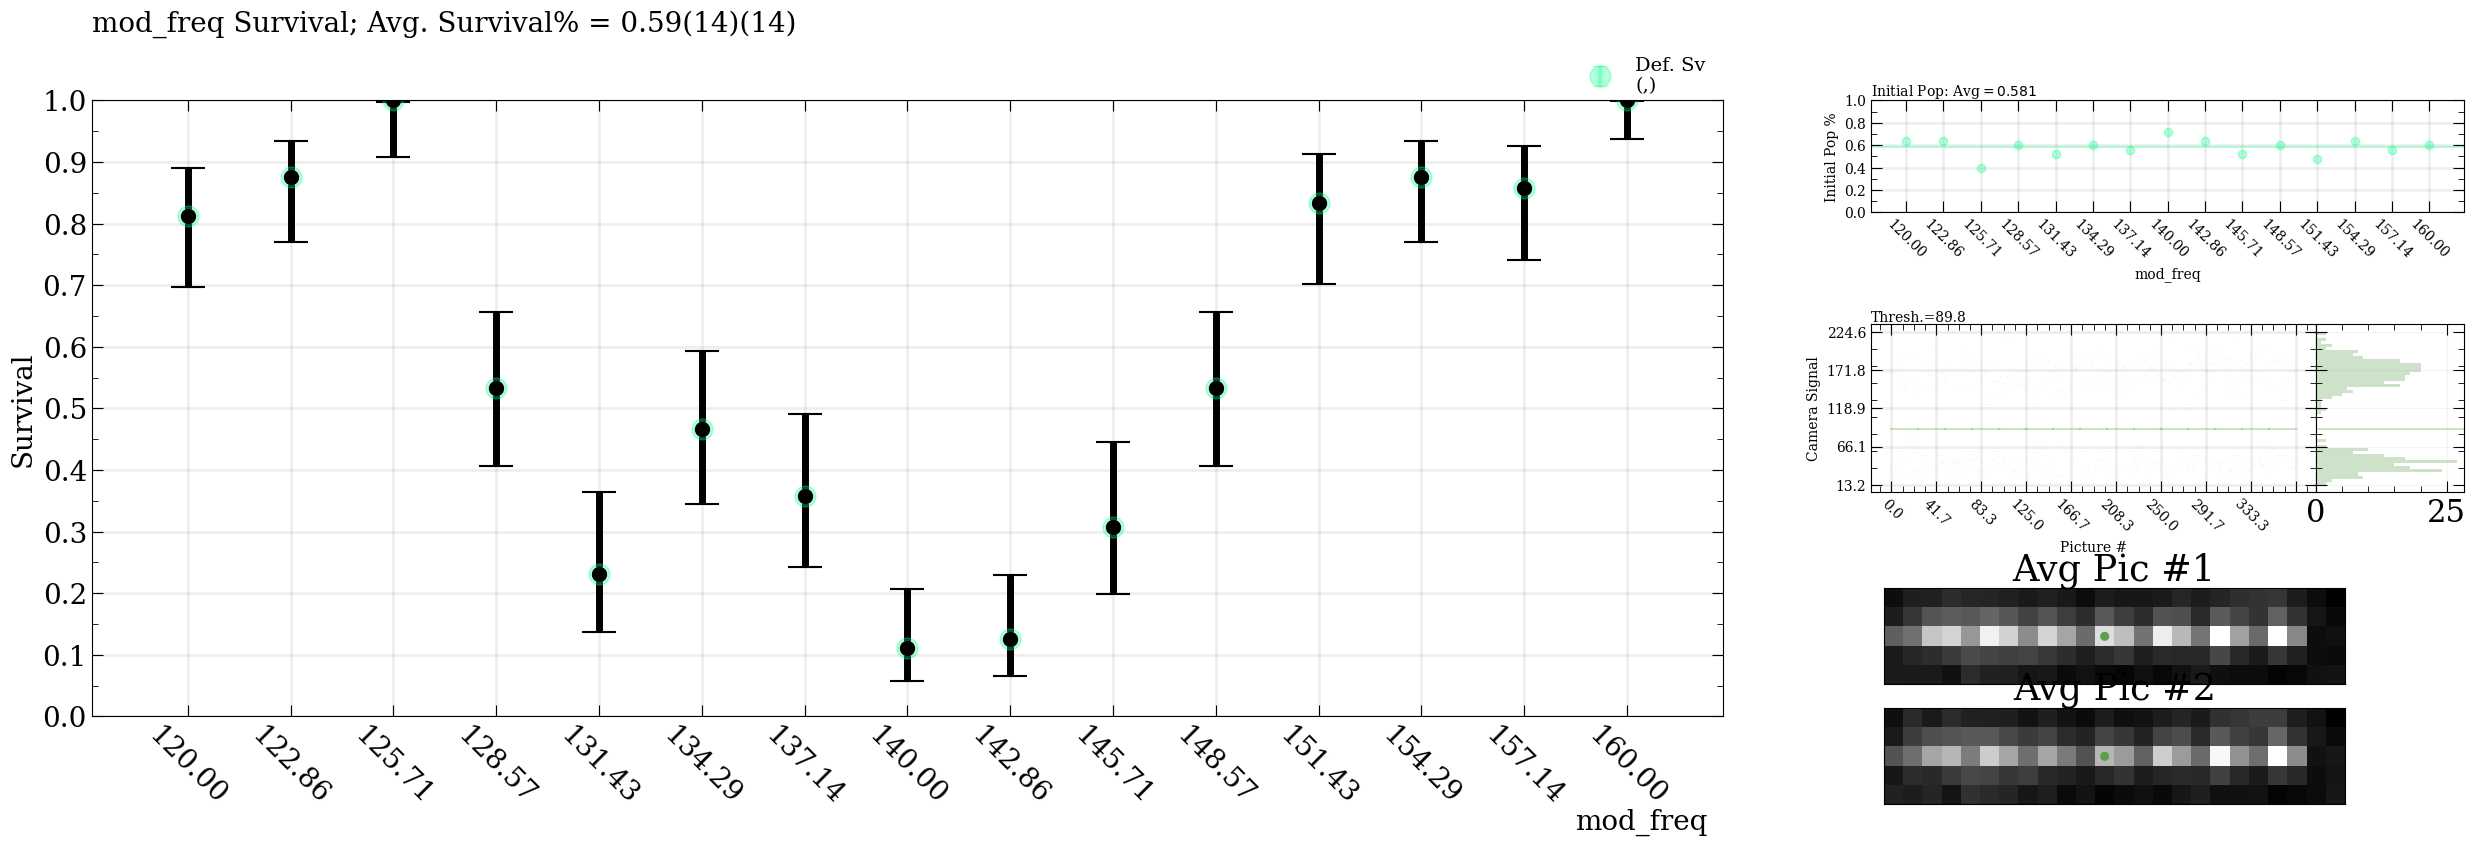

In [41]:
atomlocs = [2,11,0,1,1]
reloadMyModules(18,'April')
mp.Survival(16., atomlocs);

### File 19 (7x1_trap_frequency_measurements):  

Number of Pictures: 750; Picture Dimensions: 5 x 24
Variations: 15;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 13:16:30: on (Y-M-D) 2024-4-18, And ended at 13:19:48: on 2024-4-18
Experiment Notes:  



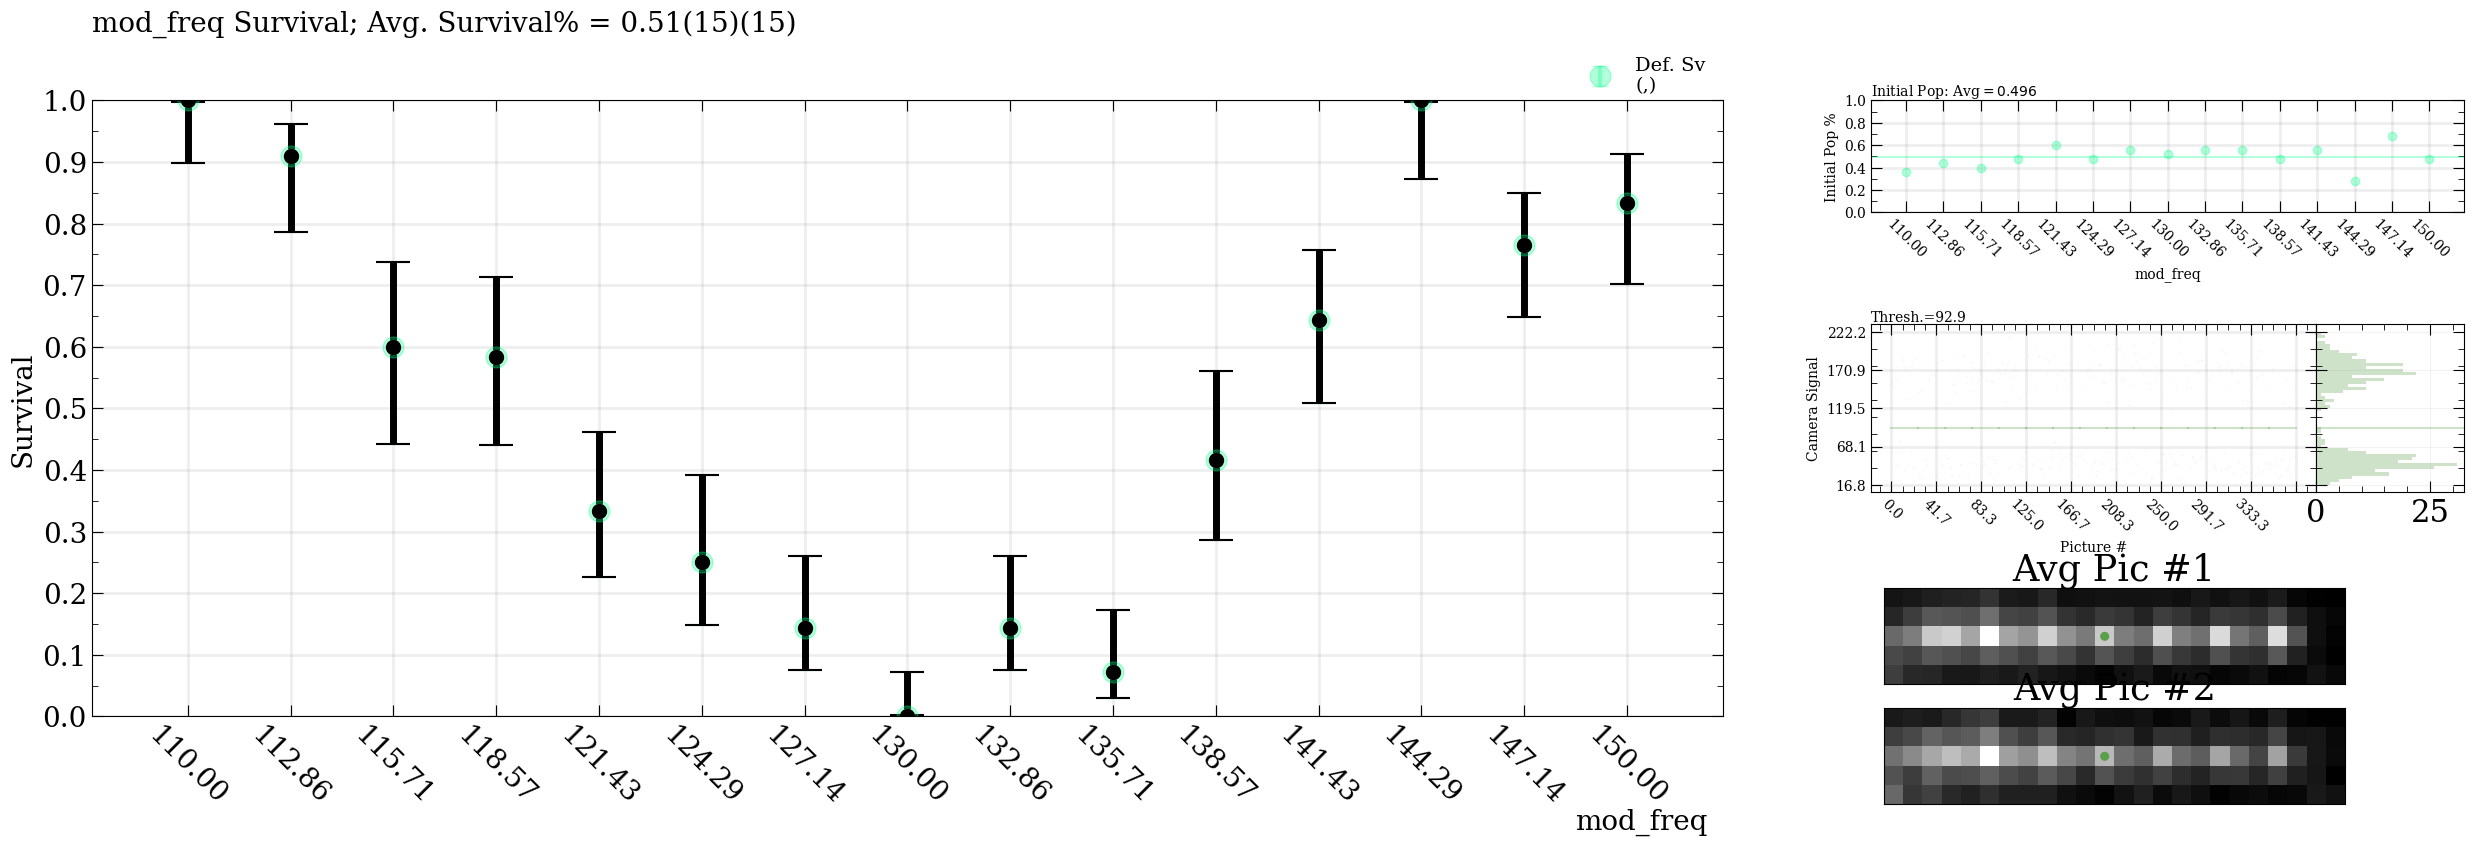

In [44]:
atomlocs = [2,11,0,1,1]
reloadMyModules(18,'April')
mp.Survival(19, atomlocs);

### File 19 (7x1_trap_frequency_measurements):  

Number of Pictures: 750; Picture Dimensions: 5 x 24
Variations: 15;	Repetitions: 25;	Exp File Version: 4;
Experiment started at (H:M:S) 13:16:30: on (Y-M-D) 2024-4-18, And ended at 13:19:48: on 2024-4-18
Experiment Notes:  



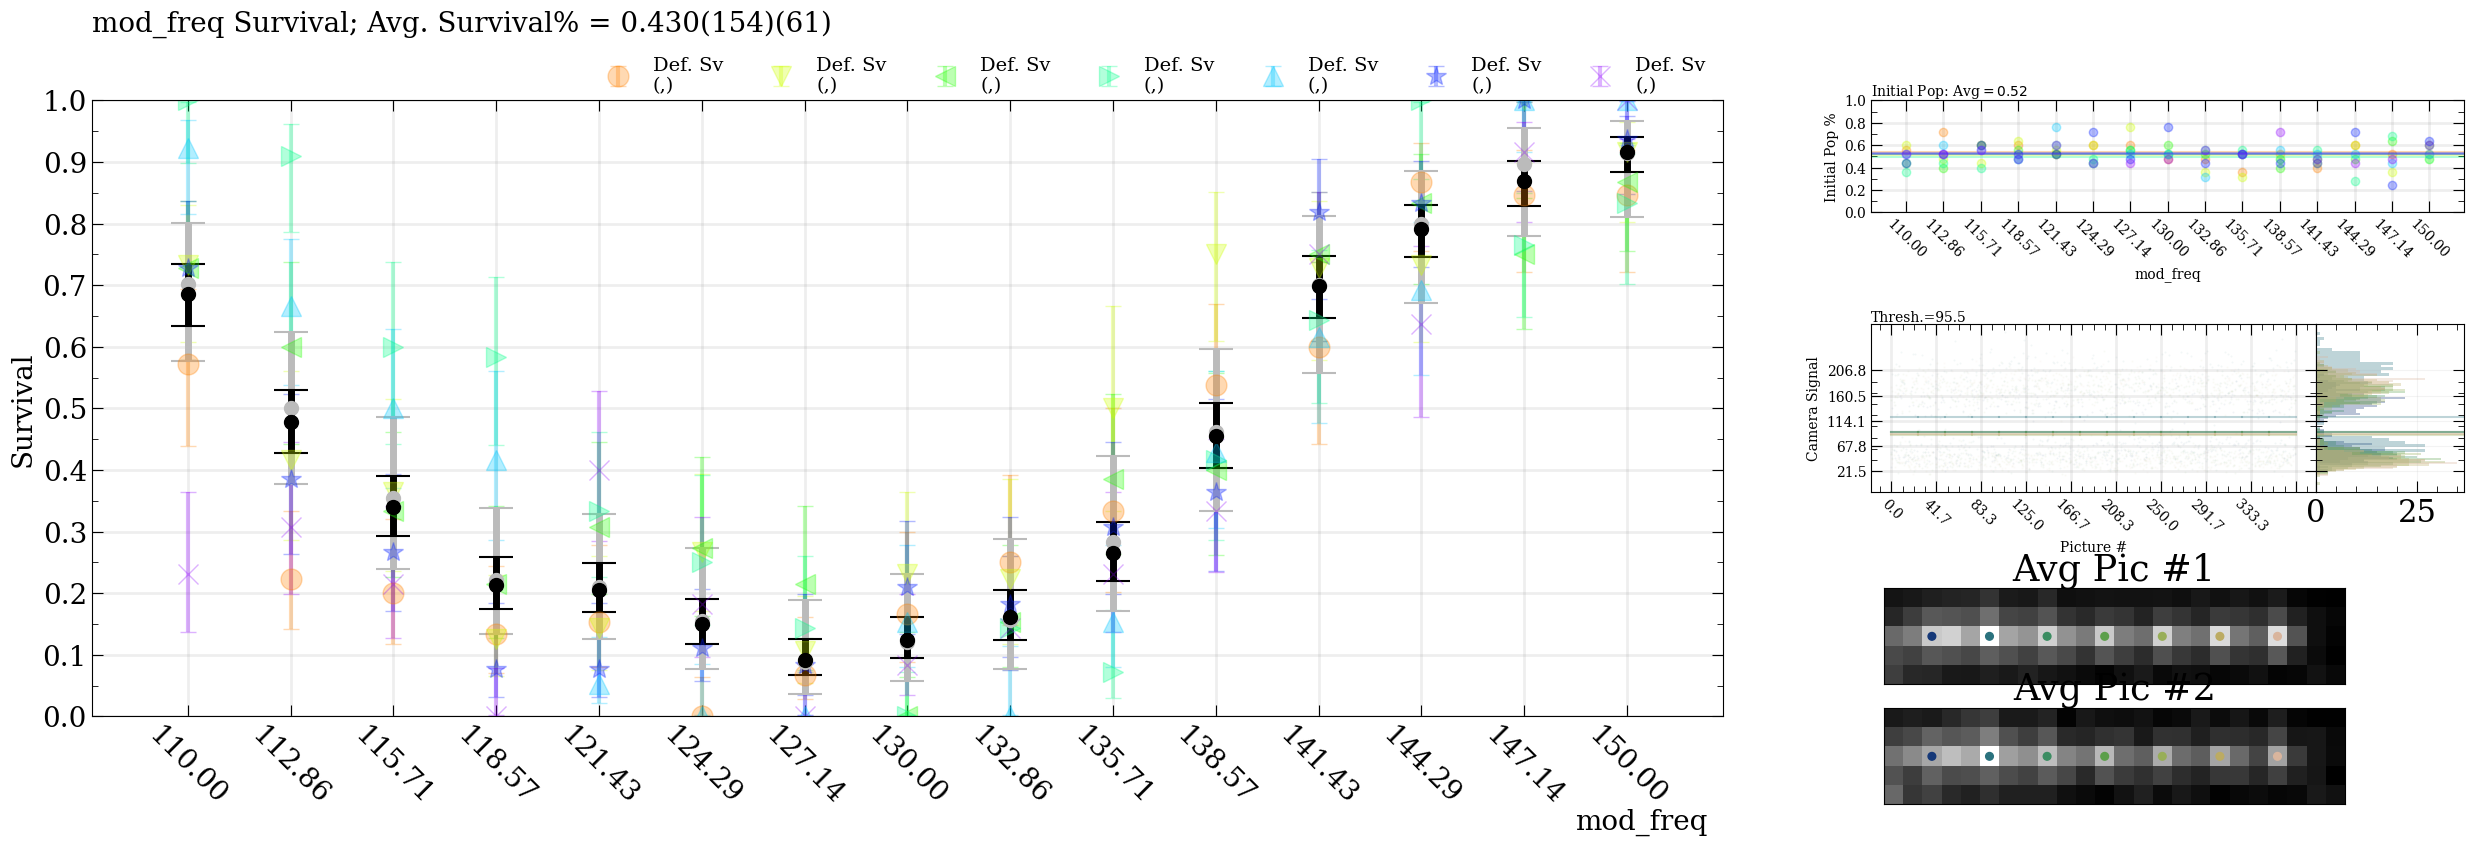

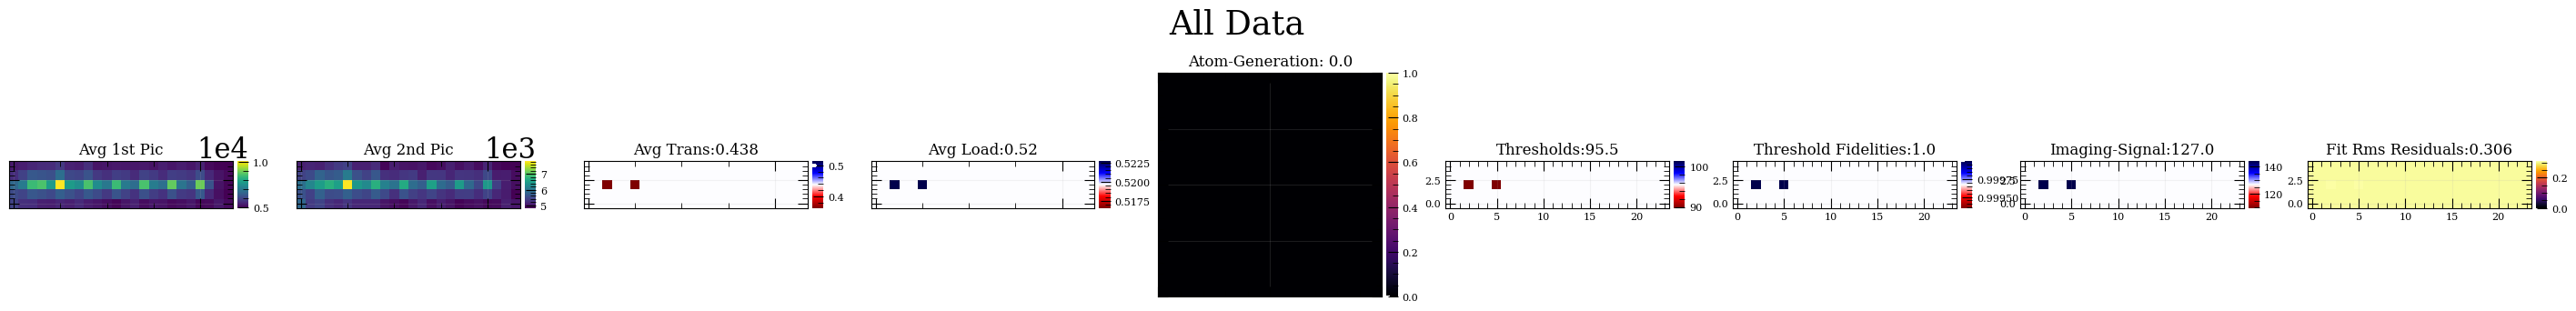

In [45]:
atomlocs = [2,2,3,7,1]
reloadMyModules(18,'April')
mp.Survival(19, atomlocs);

### File 21 (3DGSBC_Top_Sideband_Spectroscopy_1x2):  

Number of Pictures: 2000; Picture Dimensions: 5 x 24
Variations: 20;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 13:29:37: on (Y-M-D) 2024-4-18, And ended at 13:37:16: on 2024-4-18
Experiment Notes:  



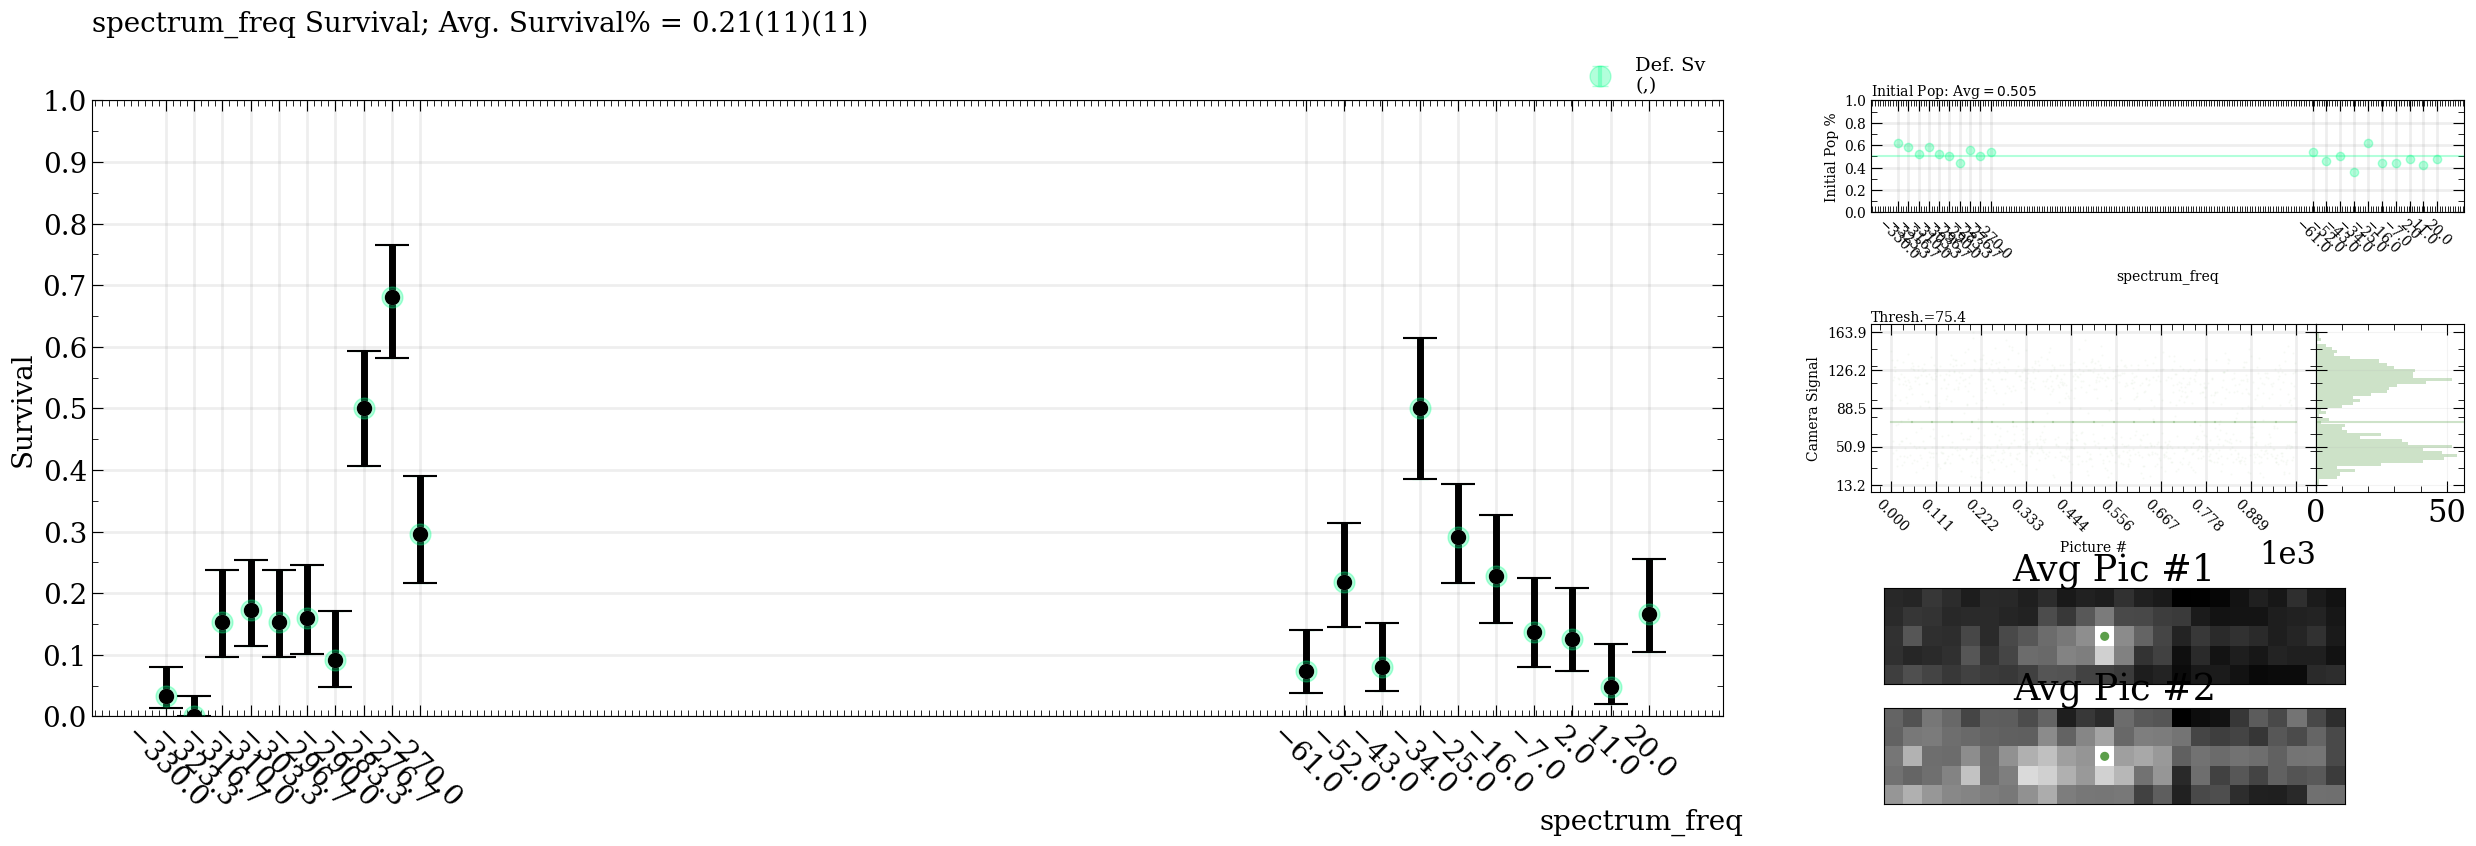

In [46]:
atomlocs = [2,11,0,1,1]
reloadMyModules(18,'April')
mp.Survival(21, atomlocs);

### File 22 (3DGSBC_Top_Sideband_Spectroscopy_1x2):  

Number of Pictures: 2000; Picture Dimensions: 5 x 24
Variations: 20;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 13:39:49: on (Y-M-D) 2024-4-18, And ended at 13:47:28: on 2024-4-18
Experiment Notes:  



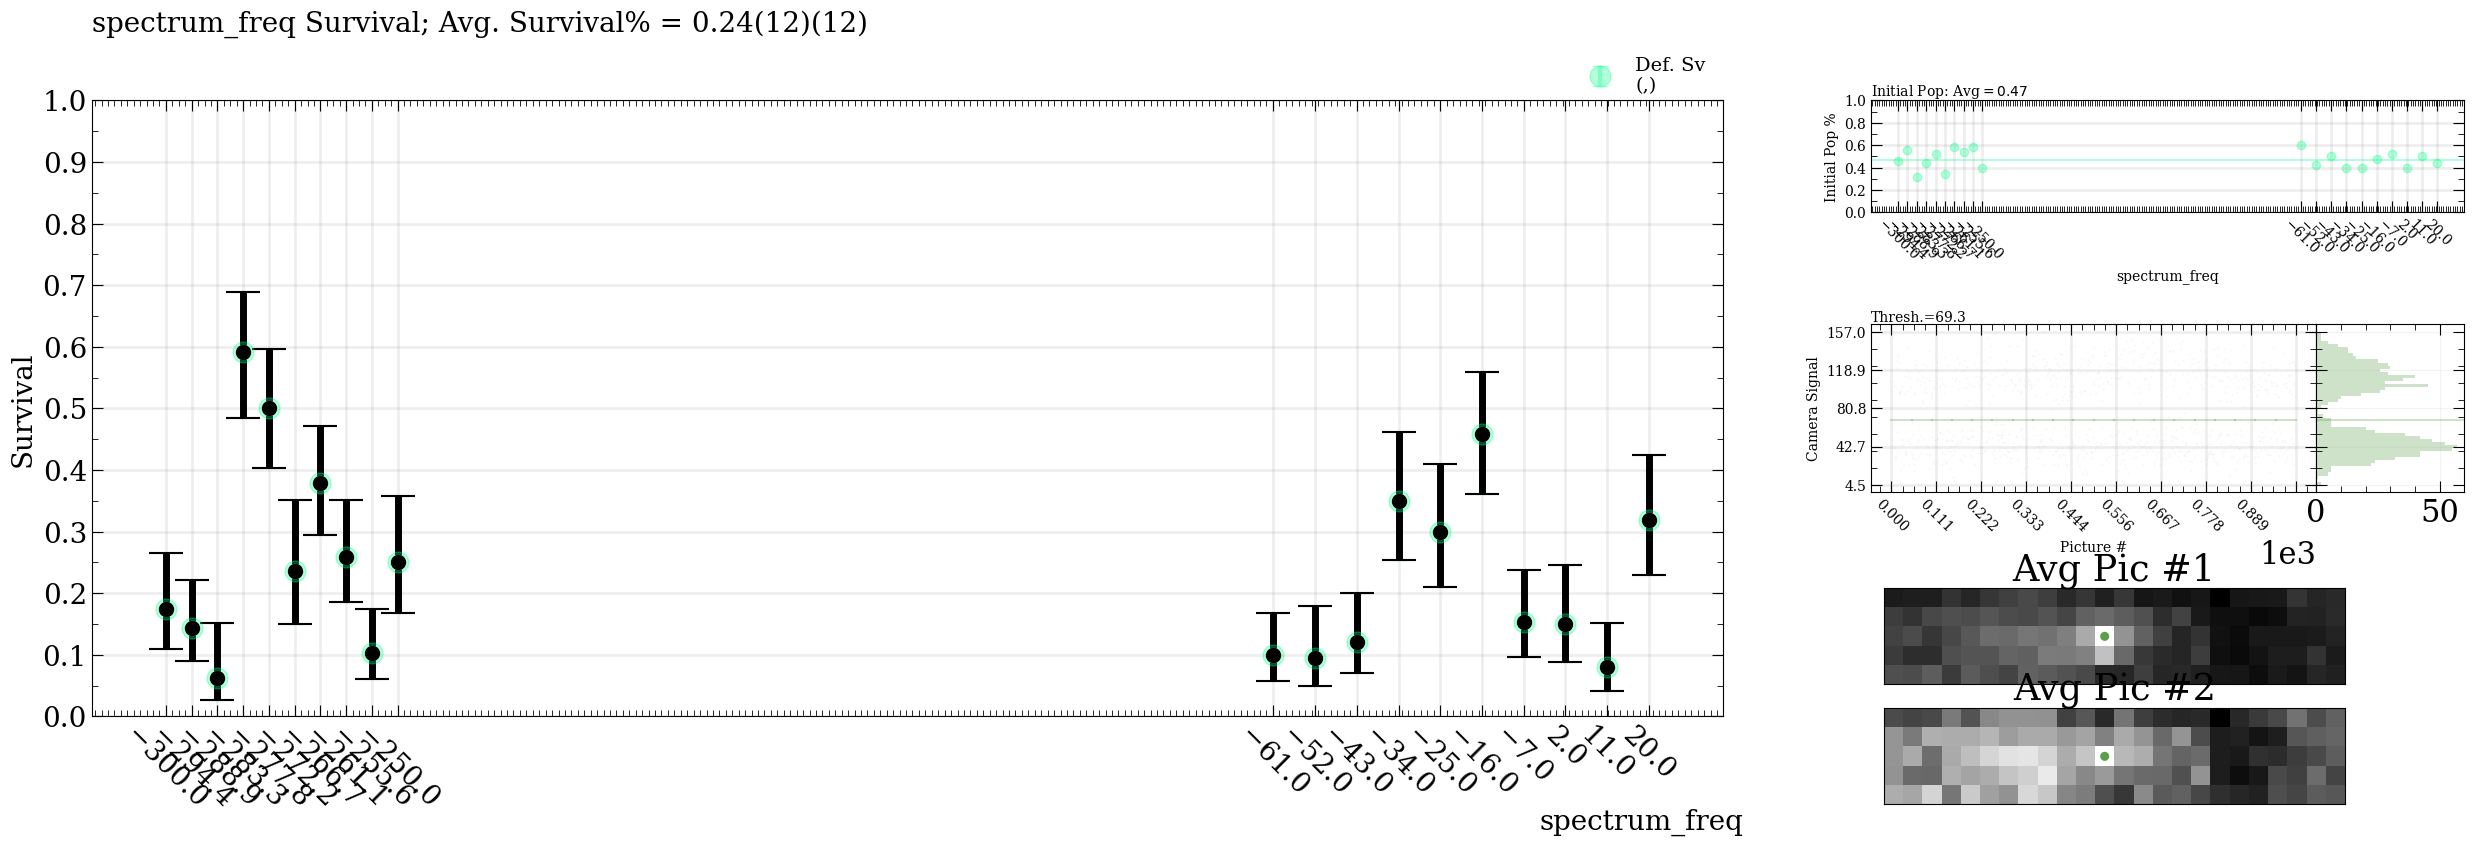

In [47]:
atomlocs = [2,11,0,1,1]
reloadMyModules(18,'April')
mp.Survival(22, atomlocs);